# COMP377: AI for Software Developers
## Assignment 2: Support Vector Machines
### Exercise 2

Name: Wenjie Zhou

Student ID: 301337168

Date: October 16, 2024

File Name: WenjieZhou_COMP377Lab2_Ex2

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import struct

### Part 1: Data Loading

In [2]:
## Part 1: Data Loading ##

# Functions to load MNIST dataset files
def load_mnist_images(filepath):
    with open(filepath, 'rb') as f:
        _ = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8)
        images = images.reshape(-1, 28 * 28)
        return images

def load_mnist_labels(filepath):
    with open(filepath, 'rb') as f:
        _ = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

# Define file paths for the dataset files
training_images_filepath = './MNIST/train-images-idx3-ubyte'
training_labels_filepath = './MNIST/train-labels-idx1-ubyte'
test_images_filepath = './MNIST/t10k-images-idx3-ubyte'
test_labels_filepath = './MNIST/t10k-labels-idx1-ubyte'

# Load the dataset files
X_train = load_mnist_images(training_images_filepath)
y_train = load_mnist_labels(training_labels_filepath)
X_test = load_mnist_images(test_images_filepath)
y_test = load_mnist_labels(test_labels_filepath)

### Part 2: Data Preprocessing

In [3]:
## Part 2: Data Pre-processing ##

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Part 3: Create and Train Model

In [4]:
## Part 3: Model Training ###

# Create and train the Support Vector Machine (SVM) model
svm_clf = svm.SVC(C=1.0, kernel='linear')
svm_clf.fit(X_train_scaled, y_train)

# Create and train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### Part 4: Test Model

In [5]:
### Part 4: Model Evaluation ###

# Make predictions using the SVM model
y_pred_svm = svm_clf.predict(X_test_scaled)

# Make predictions using the Logistic Regression model
y_pred_log = log_model.predict(X_test_scaled)

### Part 5: Calculate Accuracy & Accuracy

In [6]:
### Part 5: Model Accuracy ###

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy (SVM): {accuracy_svm}")
print(f"Precision (SVM): {precision_svm}")
print(f"Recall (SVM): {recall_svm}")

# Evaluate the Logistic Regression model
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')

print(f"Accuracy (Logistic Regression): {accuracy_log}")
print(f"Precision (Logistic Regression): {precision_log}")
print(f"Recall (Logistic Regression): {recall_log}")

# Show classification report for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Show classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Accuracy (SVM): 0.9293
Precision (SVM): 0.9294291952604579
Recall (SVM): 0.9293
Accuracy (Logistic Regression): 0.9218
Precision (Logistic Regression): 0.9216546682666027
Recall (Logistic Regression): 0.9218

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.90      0.93      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.88      0.90       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.94      0.89      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000


Logi

### Visualization and Display (Optional)

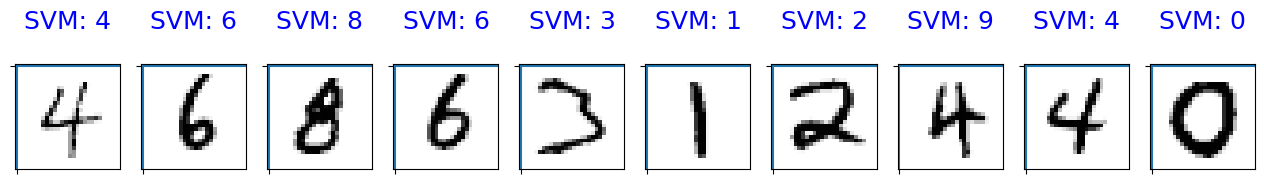

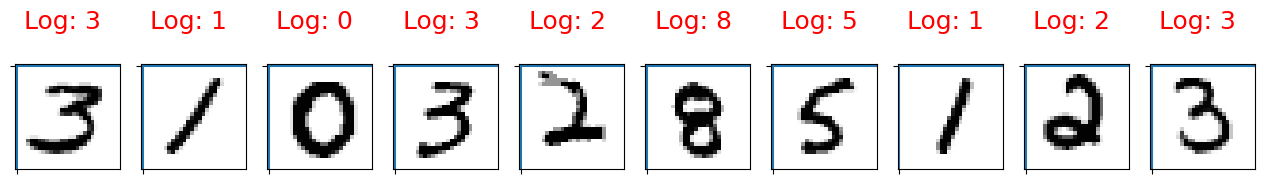

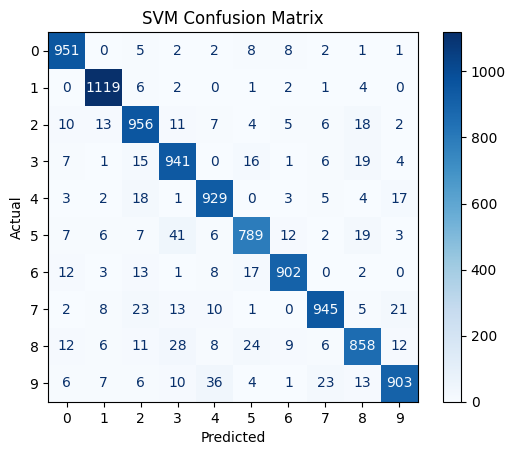

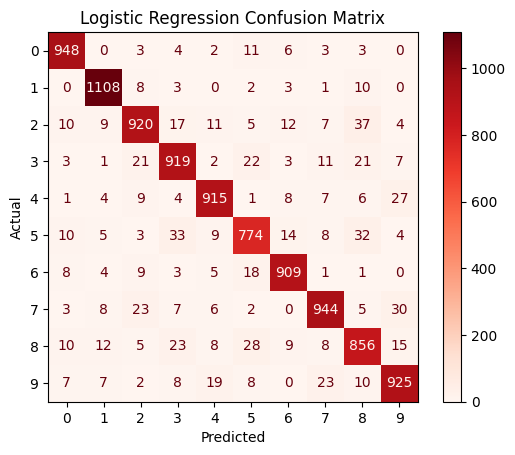

In [7]:
### Visualization & Display ###

## Print Results to the Screen ###

sample_size_to_display = 10

# Visualize 10 test results for SVM
count = 0
plt.figure(figsize=(16, 6))
for i in np.random.permutation(X_test.shape[0])[:sample_size_to_display]:
    count += 1
    plt.subplot(1, sample_size_to_display, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=2, y=-10, s=f'SVM: {y_pred_svm[i]}', fontsize=18, color='blue')
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

# Visualize 10 test results for Logistic Regression
count = 0
plt.figure(figsize=(16, 6))
for i in np.random.permutation(X_test.shape[0])[:sample_size_to_display]:
    count += 1
    plt.subplot(1, sample_size_to_display, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=2, y=-10, s=f'Log: {y_pred_log[i]}', fontsize=18, color='red')
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(y_test))
disp_svm.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=np.unique(y_test))
disp_log.plot(cmap='Reds')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Summary and Conclusions

Accuracy (SVM): 0.9293

Accuracy (Log): 0.9218

Precision (SVM): 0.9294291952604579

Precision (Log): 0.9216546682666027

Recall (SVM): 0.9293

Recall (Log): 0.9218

The Support Vector Machine (SVM) model achieved an accuracy of 92.93%, indicating strong performance in classifying MNIST digits. With a precision score of 92.94%, it demonstrates reliability in predicting the positive class (digit "1"). Its recall of 92.93% shows effective identification of true positives, suggesting that the SVM model excels at recognizing most actual "1" digits.

In comparison, the Logistic Regression model achieved a slightly lower accuracy of 92.18%. Its precision of 92.17% indicates a similar reliability, while the recall of 92.18% shows it captures many true positives. However, these results reveal that Logistic Regression, though effective, falls short of the SVM model's performance.

The differences in performance can be attributed to model characteristics. SVM excels in high-dimensional spaces and can create complex decision boundaries, making it effective for non-linearly separable data. In contrast, Logistic Regression assumes a linear relationship between features and output, which may limit its effectiveness when the data is complex. Additionally, SVM handles outliers better, influencing classification results in noisy datasets. Further exploration of hyperparameter tuning could enhance performance for both models.